In [80]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [81]:
df = pd.read_csv('Penalty_stats_propre_19-20.csv', sep=';', encoding='latin')
df.head(5)

,Id,Competition,Journee,Date,Home team,Away team,Team taking pen,Pen taker,Minute,LtD game-changing pen,DtW game-changing pen,L no game-changing,W no game-changing,Scored,PT sub,PT position,Team win,Last Goal
0,1,Premier League,1,10/08/2019,West Ham,Manchester City,Away,Sergio Aguero,84.0,NO,NO,NO,YES,NO,YES,ST,YES,NO
1,2,Premier League,1,10/08/2019,West Ham,Manchester City,Away,Sergio Aguero,86.0,NO,NO,NO,YES,YES,YES,ST,YES,NO
2,3,Premier League,1,11/08/2019,Manchester United,Chelsea,Home,Marcus Rashford,18.0,NO,YES,NO,NO,YES,NO,W,YES,NO
3,4,Premier League,2,17/08/2019,Aston Villa,Bournemouth,Away,Joshua King,2.0,NO,YES,NO,NO,YES,NO,OM,YES,NO
4,5,Premier League,2,19/08/2019,Wolverhampton,Manchester United,Away,Paul Pogba,68.0,NO,YES,NO,NO,NO,NO,DM,NO,YES


# Separando as cobraças de penalties por posições em campo

In [82]:
temp_df = df.groupby(['PT position', 'Scored']).size()
temp_df

PT position  Scored
CB           NO          1
             YES         6
DM           NO         11
             YES        49
LD           NO          7
             YES        11
OM           NO         11
             YES        57
ST           NO         54
             YES       187
W            NO         26
             YES        74
dtype: int64

<Axes: xlabel='PT position,Scored'>

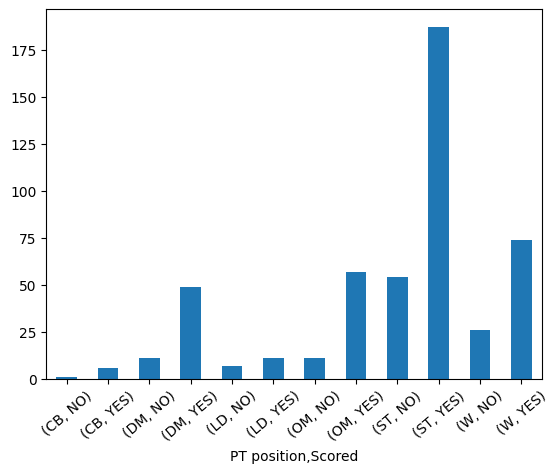

In [83]:
temp_df.plot.bar(x='PT position', y='Scored', rot=40)

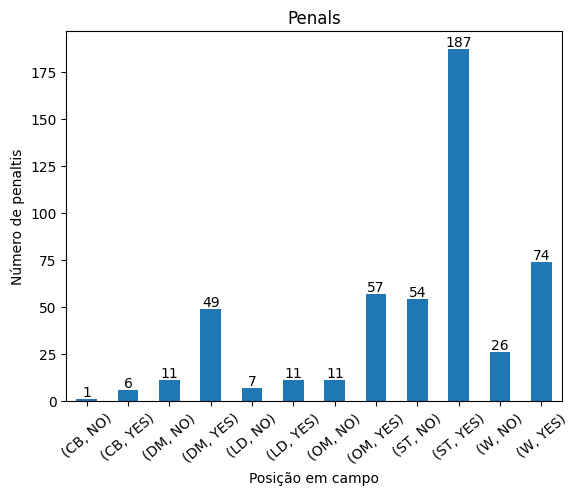

In [84]:
ax = temp_df.plot(kind='bar', xlabel='Posição em campo', ylabel='Número de penaltis', title='Penals', rot=40)
for c in ax.containers:
    ax.bar_label(c, label_type='edge')



In [85]:
temp_df.shape

(12,)

In [86]:
k = df.groupby(['PT position']).size().to_frame('total shots')
k

,total shots
PT position,
CB,7
DM,60
LD,18
OM,68
ST,241
W,100


In [87]:
total_df = df.groupby(['PT position', 'Scored']).size().unstack(fill_value=0)
total_df.head()

Scored,NO,YES
PT position,,
CB,1,6
DM,11,49
LD,7,11
OM,11,57
ST,54,187


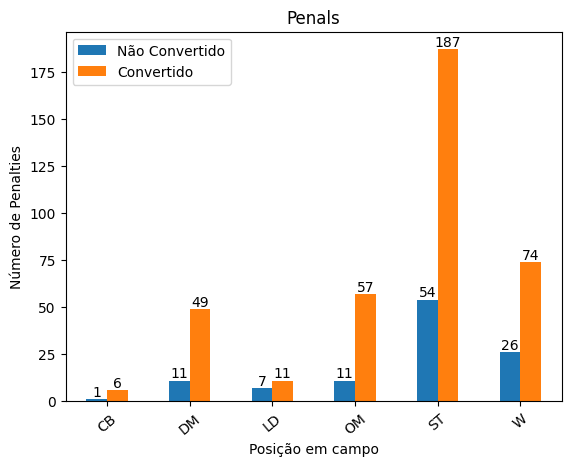

In [88]:
plot = total_df.plot(kind='bar', xlabel='Posição em campo', ylabel='Número de Penalties', title='Penals', rot=40)
for c in plot.containers:
    plot.bar_label(c, label_type='edge')
plot.legend(['Não Convertido', 'Convertido'])

## W = Winger (Ala), ST = Striker (Atacante), OM = Offensive Midfielder (Meia ofensivo), DM = Deffensive Midfielder (Meia defensivo), LD = Left Defender (Lateral Esquerdo), CB = Center Back (Zagueiro)

In [89]:
df_remade = df.groupby(['Scored', 'PT position']).size().unstack(fill_value=0)
df_remade.head()

PT position,CB,DM,LD,OM,ST,W
Scored,,,,,,
NO,1,11,7,11,54,26
YES,6,49,11,57,187,74


In [90]:
dic = {}
for position in df_remade:
    percent = df_remade[position].YES/(df_remade[position].YES + df_remade[position].NO)
    print(percent)
    to_dic = np.float16(percent)
    dic[position] = to_dic
dic

print(dic)

0.8571428571428571
0.8166666666666667
0.6111111111111112
0.8382352941176471
0.7759336099585062
0.74
{'CB': np.float16(0.857), 'DM': np.float16(0.817), 'LD': np.float16(0.6113), 'OM': np.float16(0.8384), 'ST': np.float16(0.776), 'W': np.float16(0.74)}


In [91]:

df.groupby('Competition').size()

Competition
Bundesliga           73
Champions league     46
Ligue 1              92
Premier League       95
SERIE A             188
dtype: int64

In [92]:
atacante = 0
meia_ofensivo = 0
meia_defensivo = 0
ala = 0
zagueiro = 0
lateral = 0

atacante_acertou = 0
meia_ofensivo_acertou = 0
meia_defensivo_acertou = 0
ala_acertou = 0
zagueiro_acertou = 0
lateral_acertou = 0

i = 0

while df.iloc[i,1] == "Premier League":

    if df.iloc[i,15]=='CB':
        zagueiro += 1
        if df.iloc[i,13]=='YES':
            zagueiro_acertou += 1
    if df.iloc[i,15]=='DM':
        meia_defensivo +=1
        if df.iloc[i,13]=='YES':
            meia_defensivo_acertou += 1
    if df.iloc[i,15]=='LD':
        lateral += 1
        if df.iloc[i,13]=='YES':
            lateral_acertou += 1
    if df.iloc[i,15]=='OM':
        meia_ofensivo += 1
        if df.iloc[i,13]=='YES':
            meia_ofensivo_acertou += 1
    if df.iloc[i,15]=='W':
        ala += 1
        if df.iloc[i,13]=='YES':
            ala_acertou += 1
    if df.iloc[i,15]=='ST':
        atacante += 1
        if df.iloc[i,13]=='YES':
            atacante_acertou += 1
    i +=1

total = zagueiro+meia_defensivo+lateral+meia_ofensivo+atacante+ala
total_acerto = zagueiro_acertou+meia_ofensivo_acertou+ lateral_acertou+meia_defensivo_acertou +atacante_acertou + ala_acertou

print('Penalidade no total da liga: ', total , ' e a porcentagem de acerto total é: ', 100*total_acerto/total)
print ('Penalidades por zaguiero na liga: ', zagueiro, ' e sua porcentagem de acerto: ', 100*zagueiro_acertou/(zagueiro+1))
print ('Penalidades por lateral  na liga: ', lateral,' e sua porcentagem de acerto: ', 100*lateral_acertou/lateral)
print ('Penalidades por meia defensivo na liga: ', meia_defensivo ,' e sua porcentagem de acerto: ', 100*meia_defensivo_acertou/meia_defensivo)
print ('Penalidades por meia ofensivo na liga: ', meia_ofensivo,' e sua porcentagem de acerto: ', 100*meia_ofensivo_acertou/ meia_ofensivo)
print ('Penalidades por ala na liga: ',  ala, ' e sua porcentagem de acerto: ', 100*ala_acertou/ala)
print ('Penalidades por atacante na liga: ',  atacante,' e sua porcentagem de acerto: ', 100*atacante_acertou/atacante)



Penalidade no total da liga:  95  e a porcentagem de acerto total é:  74.73684210526316
Penalidades por zaguiero na liga:  0  e sua porcentagem de acerto:  0.0
Penalidades por lateral  na liga:  1  e sua porcentagem de acerto:  100.0
Penalidades por meia defensivo na liga:  14  e sua porcentagem de acerto:  85.71428571428571
Penalidades por meia ofensivo na liga:  14  e sua porcentagem de acerto:  78.57142857142857
Penalidades por ala na liga:  25  e sua porcentagem de acerto:  68.0
Penalidades por atacante na liga:  41  e sua porcentagem de acerto:  73.17073170731707


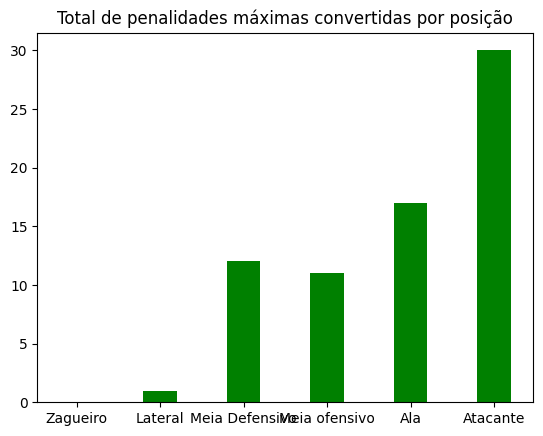

In [93]:
plt.bar(['Zagueiro', 'Lateral', 'Meia Defensivo', 'Meia ofensivo', 'Ala', 'Atacante'], [zagueiro_acertou, lateral_acertou, meia_defensivo_acertou, meia_ofensivo_acertou, ala_acertou, atacante_acertou], width=0.4, color="green")
plt.title('Total de penalidades máximas convertidas por posição')
plt.show()

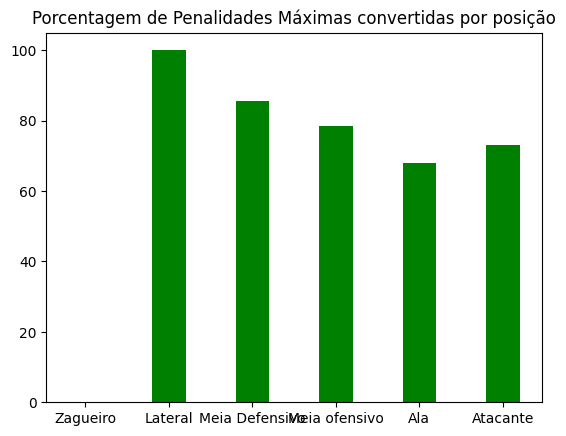

In [94]:
plt.bar(['Zagueiro', 'Lateral', 'Meia Defensivo', 'Meia ofensivo', 'Ala', 'Atacante'], [0, 100*lateral_acertou/lateral, 100*meia_defensivo_acertou/meia_defensivo, 100*meia_ofensivo_acertou/meia_ofensivo, 100*ala_acertou/ala, 100*atacante_acertou/atacante], color="green", width=0.4)
plt.title("Porcentagem de Penalidades Máximas convertidas por posição")
plt.show()

<h3> Os alas parecem não ter muita facilidade na conversão de penalidades máximas apesar de baterem com relativa frequência, estando apenas atrás dos atacantes. Os meia defensivos tem um alto índice de conversão, pode ser pela treino em realizar toques de precisão. Os laterais têm 100% de conversão, no entanto temos apenas uma cobrança, então não podemos tirar conclusões. <h3>

<h1>Vamos realizar os mesmos estudos para as outras ligas e ver se os dados batem.<h1

In [95]:
print(df.iloc[95,1])
print(df.iloc[94,1])

Ligue 1
Premier League


Ligue 1 começa na posição 95 e tem 92 cobranças.

In [96]:
df.iloc[186,1]
# Vamos zerar as cobraças e realizar a mesma soma para comparação de gols nesta competição
meia_ofensivo = 0
meia_defensivo = 0
ala = 0
zagueiro = 0
lateral = 0

atacante_acertou = 0
meia_ofensivo_acertou = 0
meia_defensivo_acertou = 0
ala_acertou = 0
zagueiro_acertou = 0
lateral_acertou = 0


for i in range (95, 187):
    if df.iloc[i,1]!='Ligue 1':
        break
    if df.iloc[i,15]=='CB':
        zagueiro += 1
        if df.iloc[i,13]=='YES':
            zagueiro_acertou += 1
    if df.iloc[i,15]=='DM':
        meia_defensivo +=1
        if df.iloc[i,13]=='YES':
            meia_defensivo_acertou += 1
    if df.iloc[i,15]=='LD':
        lateral += 1
        if df.iloc[i,13]=='YES':
            lateral_acertou += 1
    if df.iloc[i,15]=='OM':
        meia_ofensivo += 1
        if df.iloc[i,13]=='YES':
            meia_ofensivo_acertou += 1
    if df.iloc[i,15]=='W':
        ala += 1
        if df.iloc[i,13]=='YES':
            ala_acertou += 1
    if df.iloc[i,15]=='ST':
        atacante += 1
        if df.iloc[i,13]=='YES':
            atacante_acertou += 1


total = zagueiro+meia_defensivo+lateral+meia_ofensivo+atacante+ala
total_acerto = zagueiro_acertou+meia_ofensivo_acertou+ lateral_acertou+meia_defensivo_acertou +atacante_acertou + ala_acertou

print('Penalidade no total da liga: ', total , ' e a porcentagem de acerto total é: ', 100*total_acerto/total)
print ('Penalidades por zaguiero na liga: ', zagueiro, ' e sua porcentagem de acerto: ', 100*zagueiro_acertou/(zagueiro+1))
print ('Penalidades por lateral  na liga: ', lateral,' e sua porcentagem de acerto: ', 100*lateral_acertou/lateral)
print ('Penalidades por meia defensivo na liga: ', meia_defensivo ,' e sua porcentagem de acerto: ', 100*meia_defensivo_acertou/meia_defensivo)
print ('Penalidades por meia ofensivo na liga: ', meia_ofensivo,' e sua porcentagem de acerto: ', 100*meia_ofensivo_acertou/ meia_ofensivo)
print ('Penalidades por ala na liga: ',  ala, ' e sua porcentagem de acerto: ', 100*ala_acertou/ala)
print ('Penalidades por atacante na liga: ',  atacante,' e sua porcentagem de acerto: ', 100*atacante_acertou/atacante)



Penalidade no total da liga:  133  e a porcentagem de acerto total é:  50.37593984962406
Penalidades por zaguiero na liga:  0  e sua porcentagem de acerto:  0.0
Penalidades por lateral  na liga:  2  e sua porcentagem de acerto:  100.0
Penalidades por meia defensivo na liga:  13  e sua porcentagem de acerto:  76.92307692307692
Penalidades por meia ofensivo na liga:  8  e sua porcentagem de acerto:  100.0
Penalidades por ala na liga:  24  e sua porcentagem de acerto:  75.0
Penalidades por atacante na liga:  86  e sua porcentagem de acerto:  33.72093023255814


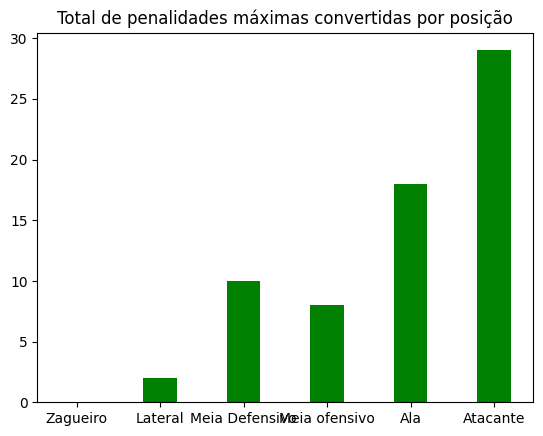

In [97]:
plt.bar(['Zagueiro', 'Lateral', 'Meia Defensivo', 'Meia ofensivo', 'Ala', 'Atacante'], [zagueiro_acertou, lateral_acertou, meia_defensivo_acertou, meia_ofensivo_acertou, ala_acertou, atacante_acertou], width=0.4, color="green")
plt.title('Total de penalidades máximas convertidas por posição')
plt.show()

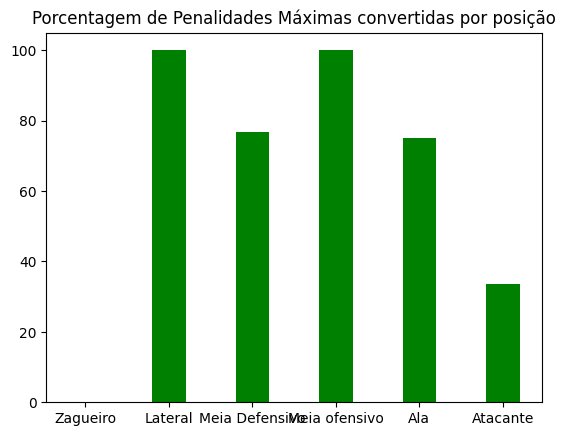

In [98]:
plt.bar(['Zagueiro', 'Lateral', 'Meia Defensivo', 'Meia ofensivo', 'Ala', 'Atacante'], [0, 100*lateral_acertou/lateral, 100*meia_defensivo_acertou/meia_defensivo, 100*meia_ofensivo_acertou/meia_ofensivo, 100*ala_acertou/ala, 100*atacante_acertou/atacante], color="green", width=0.4)
plt.title("Porcentagem de Penalidades Máximas convertidas por posição")
plt.show()

<h3> Os atacantes realmente costumam bater mais penalidades nesta liga, mas sua frequência de sucesso é ainda menor do que na Premier. Os alas melhoraram sua performances com quase os mesmos números de penalidades cobradas, e os meio campistas tem um sucesso ainda maior do que na Premier apesar de terem cobrados menos penalties no geral, de 28 na Premier para 21 na Ligue 1, mas com suas chances são mais altas. <h3>